In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import utils

root_dir_walk = os.walk('..')

plate_files = []

for dirpath, dirnames, filenames in root_dir_walk:
    if (e := re.search('\.\./([0-9]+)', dirpath)) is not None:
        experiment_number = int(e.group(1))
        if 1 <= experiment_number <= 22:
            for filename in filenames:
                if filename.split('.')[-1] == 'CSV' and 'pathlength' not in filename.lower():
                    plate_files.append(os.path.join(dirpath, filename))
                    
df = pd.concat([utils.bmg.parse_bmg(i) for i in plate_files])
df.head()

Cannot cast Index to dtype int64
Cannot cast Index to dtype int64


0     220    221    222    223    224    225    226    227    228    229  ...  \
A1  1.794  2.044  3.500  2.624  2.189  2.374  2.827  2.738  2.903  2.744  ...   
B1  2.072  2.284  2.616  2.492  2.142  2.279  2.664  2.674  2.813  2.829  ...   
C1  2.074  2.132  2.310  3.160  2.696  2.722  2.912  2.637  2.845  2.916  ...   
D1  2.060  2.130  2.234  2.063  2.081  2.481  2.578  2.729  3.500  3.500  ...   
E1  2.010  2.180  2.689  2.782  2.116  2.343  2.567  2.654  2.833  2.749  ...   

0     791    792    793    794    795    796    797    798    799    800  
A1  0.028  0.027  0.027  0.028  0.028  0.028  0.029  0.028  0.026  0.026  
B1  0.021  0.022  0.021  0.023  0.024  0.023  0.024  0.023  0.021  0.021  
C1  0.025  0.025  0.025  0.025  0.026  0.026  0.028  0.026  0.024  0.024  
D1  0.021  0.021  0.021  0.022  0.023  0.023  0.025  0.023  0.021  0.022  
E1  0.024  0.024  0.024  0.025  0.026  0.026  0.027  0.026  0.023  0.024  

[5 rows x 581 columns]

  0%|          | 0/26160 [00:00<?, ?it/s]

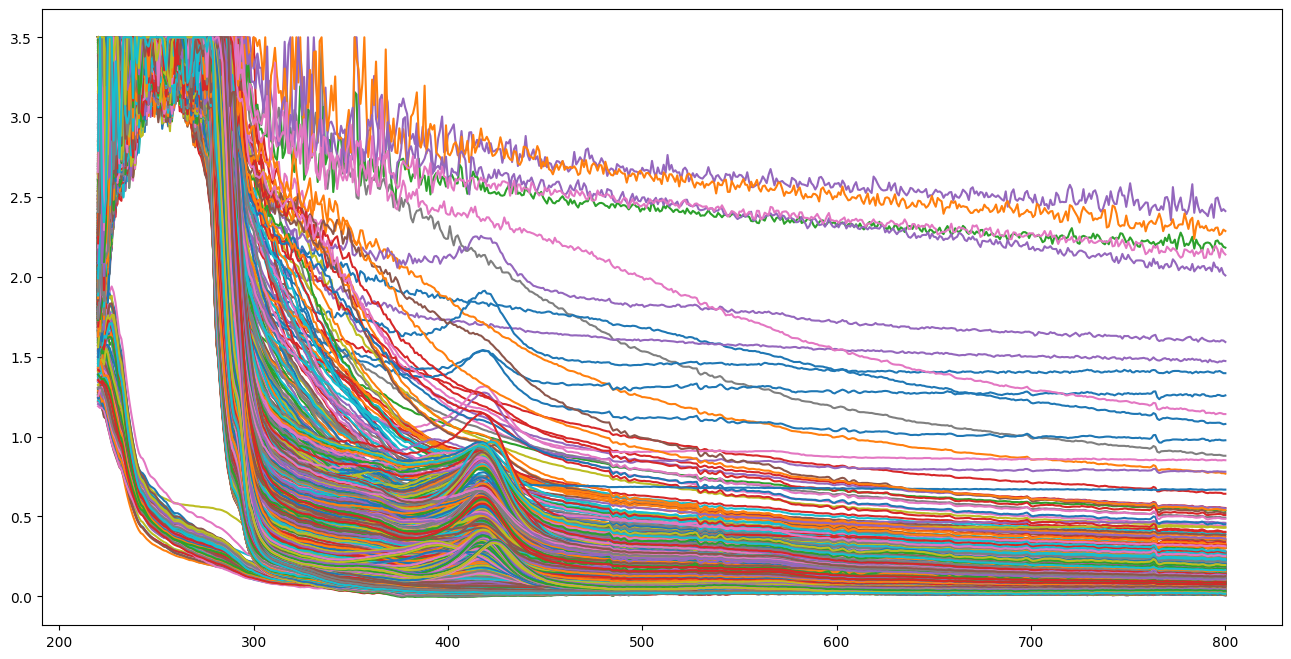

In [2]:
plt.figure(figsize=(16,8))
for i in tqdm(range(len(df))):
    row = df.iloc[i, :]
    plt.plot(row)
plt.show()

  0%|          | 0/26160 [00:00<?, ?it/s]

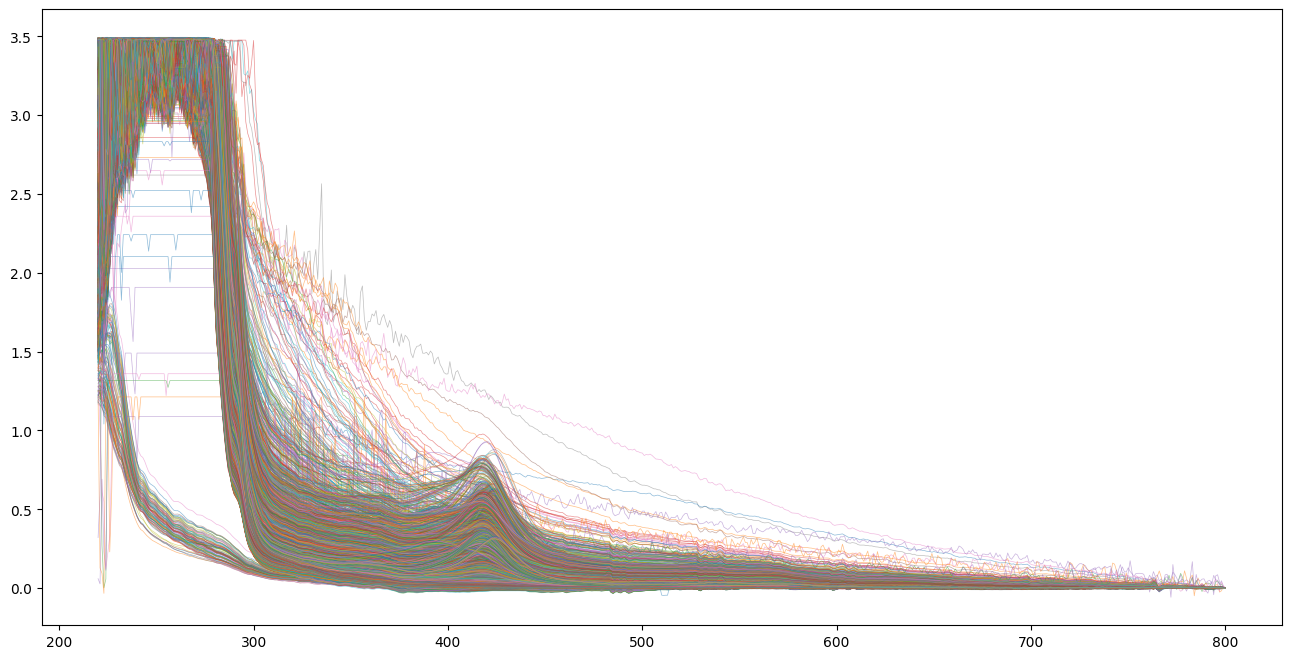

In [3]:
df_corr = df.subtract(df[800], axis=0)

plt.figure(figsize=(16,8))
for i in tqdm(range(len(df_corr))):
    row = df_corr.iloc[i, :]
    plt.plot(row,
            lw=0.5,
            alpha=0.5,
            )
plt.show()

  0%|          | 0/96 [00:00<?, ?it/s]

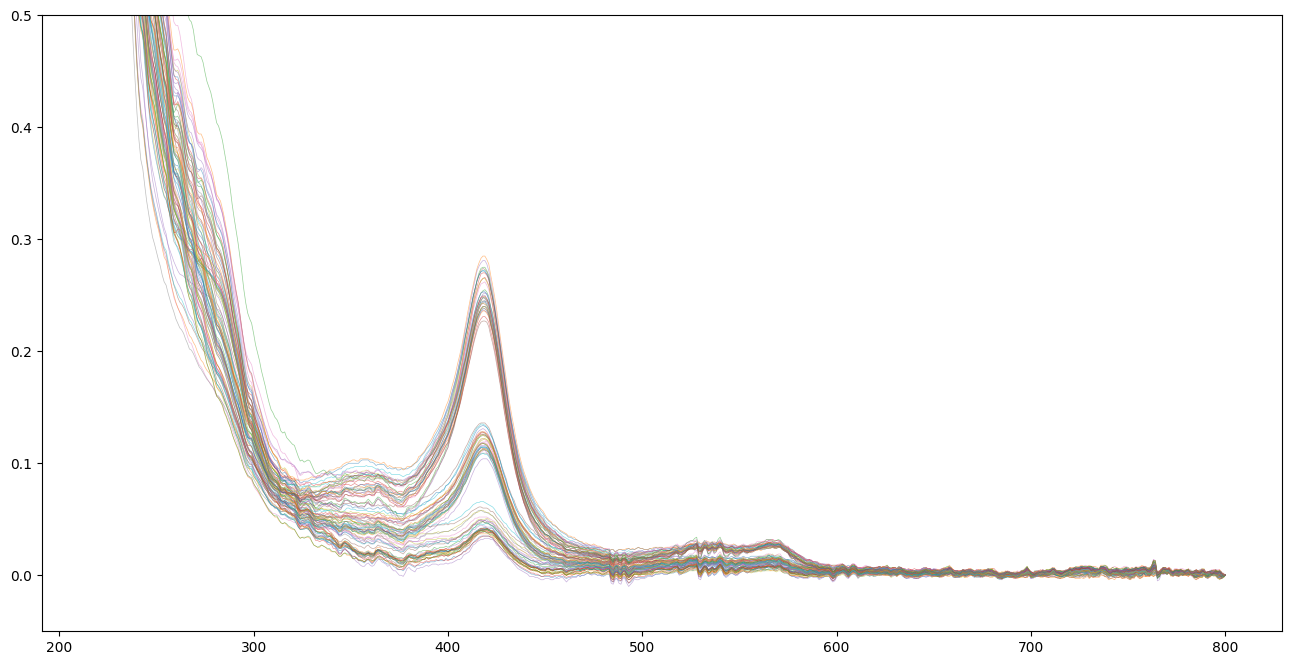

In [4]:
df_clear = df_corr.loc[df_corr[280] < 1, :]
df_normal = df_corr.loc[df_corr[280] > 1, :]

plt.figure(figsize=(16,8))
for i in tqdm(range(len(df_clear))):
    row = df_clear.iloc[i, :]
    plt.plot(row,
            lw=0.5,
            alpha=0.5,
            )
plt.ylim(-0.05, 0.5)
plt.show()

  0%|          | 0/24528 [00:00<?, ?it/s]

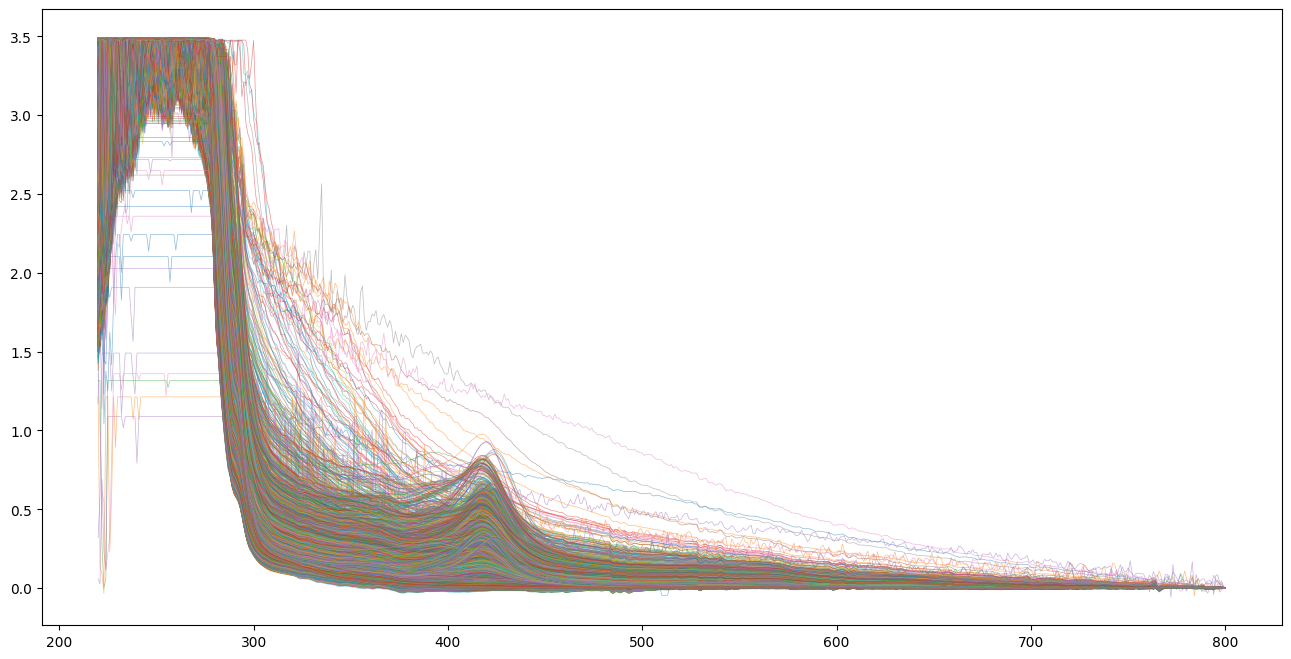

In [5]:

plt.figure(figsize=(16,8))
for i in tqdm(range(len(df_normal))):
    row = df_normal.iloc[i, :]
    plt.plot(row,
            lw=0.5,
            alpha=0.5,
            )
plt.show()

  0%|          | 0/24528 [00:00<?, ?it/s]

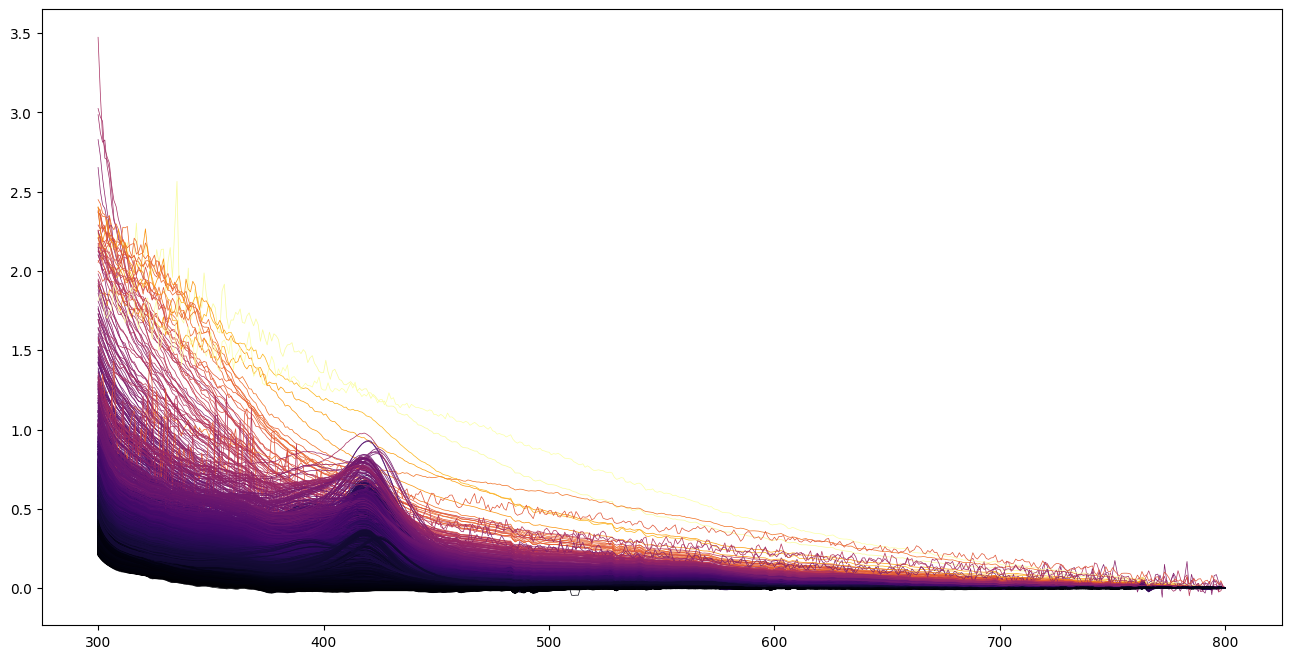

In [6]:
df_normal = df_normal.loc[:, 300:]

auc = np.trapz(df_normal, axis=1)
_auc_norm = auc - min(auc)
auc_norm = _auc_norm / max(_auc_norm)

colors = plt.cm.inferno(auc_norm)

fig = plt.figure(figsize=(16,8))
for i in tqdm(range(len(df_normal))):
    row = df_normal.iloc[i, :]
    plt.plot(row,
             lw=0.5,
             c=colors[i],
            )
plt.show()

In [7]:
auc

array([13.7115,  6.0415, 13.712 , ..., 11.677 , 32.681 ,  9.7265])

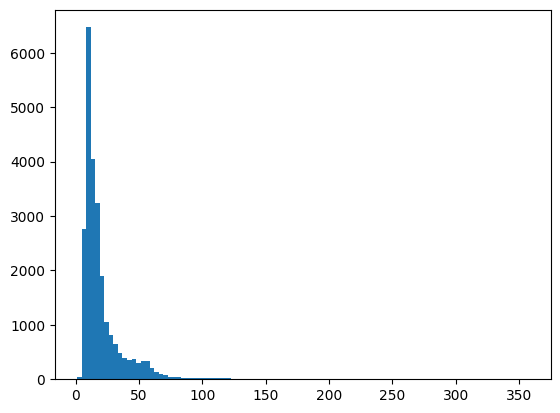

In [8]:
plt.hist(auc, bins=100)
plt.show()

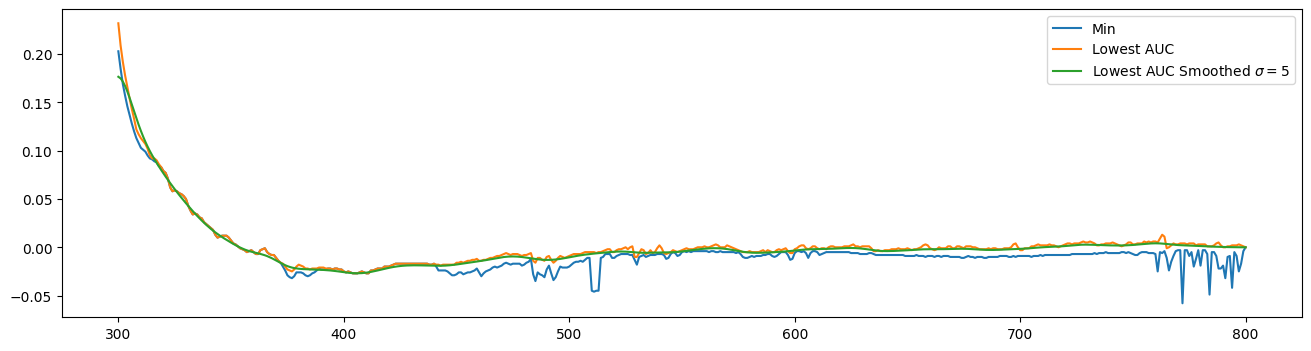

In [9]:
from scipy import ndimage

baseline = df_normal.iloc[auc.argmin(), :]
sigma = 5
baseline_smooth = pd.Series(ndimage.gaussian_filter1d(baseline, sigma=sigma), index=baseline.index)
baseline_smooth -= baseline_smooth[800]

plt.figure(figsize=(16, 4))
plt.plot(df_normal.min(), label='Min')
plt.plot(baseline, label='Lowest AUC')
plt.plot(baseline_smooth, label=f'Lowest AUC Smoothed $\sigma = {sigma}$')
plt.legend()
plt.show()

In [10]:
ndimage.gaussian_filter1d(df_normal, sigma=10)

array([[0.26577986, 0.26510254, 0.26375993, ..., 0.00167246, 0.00166855,
        0.00166655],
       [0.23788206, 0.23722615, 0.23592554, ..., 0.00133568, 0.00133922,
        0.001341  ],
       [0.26241176, 0.26172691, 0.26036935, ..., 0.0014594 , 0.00146091,
        0.00146166],
       ...,
       [0.25027137, 0.24963383, 0.24836993, ..., 0.00326502, 0.00323497,
        0.00321978],
       [0.30860825, 0.30783355, 0.30629933, ..., 0.0031179 , 0.00308831,
        0.00307337],
       [0.23958428, 0.23894765, 0.23768556, ..., 0.00266874, 0.00264305,
        0.00263009]])

In [12]:
df_normal_smooth.subtract(df_normal_smooth[800], axis=0)

0        300       301       302       303       304       305       306  \
A1  0.308455  0.306091  0.301528  0.295067  0.287112  0.278118  0.268537   
B1  0.278584  0.276346  0.272024  0.265905  0.258369  0.249844  0.240757   
C1  0.305463  0.303085  0.298492  0.291989  0.283981  0.274923  0.265269   
D1  0.276687  0.274451  0.270133  0.264018  0.256487  0.247966  0.238881   
E1  0.302422  0.300038  0.295434  0.288913  0.280881  0.271794  0.262107   
..       ...       ...       ...       ...       ...       ...       ...   
L9  0.279454  0.277234  0.272951  0.266895  0.259452  0.251052  0.242123   
M9  0.362329  0.359475  0.353963  0.346163  0.336565  0.325721  0.314185   
N9  0.289465  0.287240  0.282946  0.276874  0.269407  0.260978  0.252012   
O9  0.358712  0.355881  0.350416  0.342679  0.333155  0.322390  0.310931   
P9  0.279114  0.276891  0.272602  0.266534  0.259071  0.250642  0.241675   

0        307       308       309  ...       791       792       793       794  \
A1  0.258779  0.249179  0.239981  ...  0.000448  0.000398  0.000340  0.000278   
B1  0.231490  0.222355  0.213578  ... -0.000008  0.000014  0.000028  0.000035   
C1  0.255430  0.245742  0.236451  ...  0.000103  0.000104  0.000098  0.000086   
D1  0.229613  0.220474  0.211689  ... -0.000461 -0.000393 -0.000325 -0.000257   
E1  0.252231  0.242504  0.233173  ...  0.000018  0.000031  0.000036  0.000036   
..       ...       ...       ...  ...       ...       ...       ...       ...   
L9  0.233046  0.224128  0.215590  ...  0.001733  0.001508  0.001269  0.001024   
M9  0.302456  0.290946  0.279959  ...  0.001559  0.001345  0.001125  0.000904   
N9  0.242892  0.233928  0.225340  ...  0.001624  0.001402  0.001174  0.000943   
O9  0.299274  0.287829  0.276899  ...  0.001592  0.001385  0.001168  0.000944   
P9  0.232551  0.223579  0.214983  ...  0.001205  0.001033  0.000859  0.000687   

0        795       796       797       798       799  800  
A1  0.000214  0.000153  0.000097  0.000051  0.000017  0.0  
B1  0.000035  0.000031  0.000023  0.000013  0.000005  0.0  
C1  0.000071  0.000053  0.000035  0.000019  0.000007  0.0  
D1 -0.000192 -0.000132 -0.000082 -0.000041 -0.000014  0.0  
E1  0.000031  0.000025  0.000017  0.000010  0.000003  0.0  
..       ...       ...       ...       ...       ...  ...  
L9  0.000781  0.000551  0.000346  0.000179  0.000061  0.0  
M9  0.000687  0.000484  0.000304  0.000157  0.000054  0.0  
N9  0.000718  0.000506  0.000318  0.000165  0.000056  0.0  
O9  0.000722  0.000512  0.000323  0.000168  0.000057  0.0  
P9  0.000520  0.000365  0.000229  0.000119  0.000041  0.0  

[24528 rows x 501 columns]

  0%|          | 0/24528 [00:00<?, ?it/s]

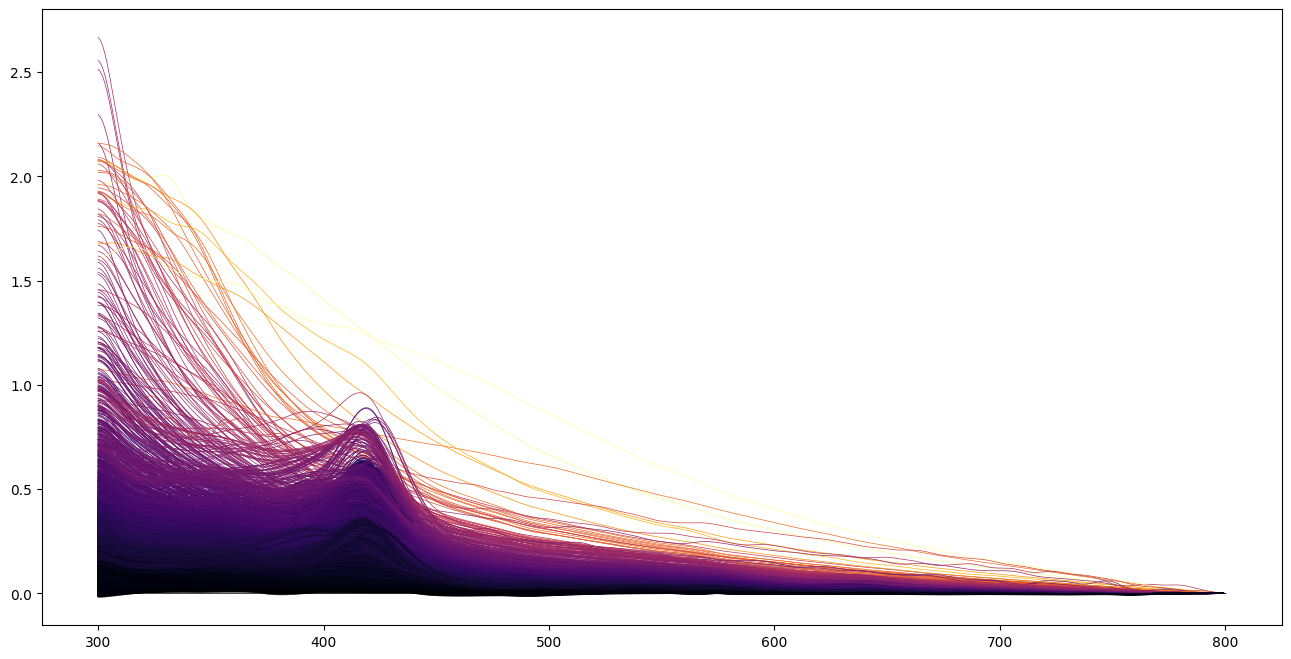

In [14]:
df_normal_smooth = pd.DataFrame(ndimage.gaussian_filter1d(df_normal, 
                                                          sigma=5,
                                                          axis=1,), 
                                columns=df_normal.columns, 
                                index=df_normal.index,
                               )

df_normal_smooth =  df_normal_smooth.subtract(df_normal_smooth[800], axis=0)

auc_smooth = np.trapz(df_normal_smooth, axis=1)
_auc_norm_smooth = auc_smooth - min(auc_smooth)
auc_norm_smooth = _auc_norm_smooth / max(_auc_norm_smooth)

baseline = df_normal_smooth.iloc[auc_norm_smooth.argmin(), :]

df_normal_smooth = df_normal_smooth - baseline_smooth

colors_smooth = plt.cm.inferno(auc_norm_smooth)


fig = plt.figure(figsize=(16,8))
for i in tqdm(range(len(df_normal_smooth))):
    row = df_normal_smooth.iloc[i, :]
    plt.plot(row,
             lw=0.5,
             c=colors_smooth[i],
            )
plt.show()

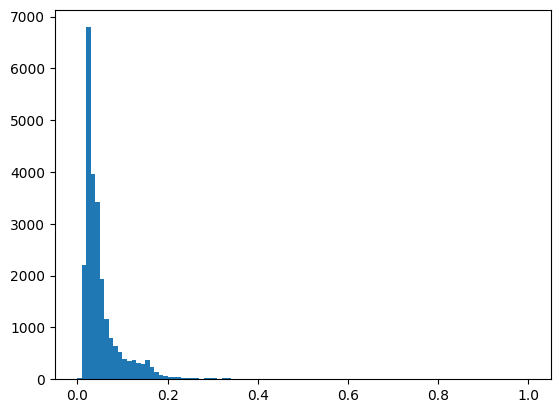

In [15]:
plt.hist(auc_norm_smooth, bins=100)
plt.show()

[]

  0%|          | 0/24528 [00:00<?, ?it/s]

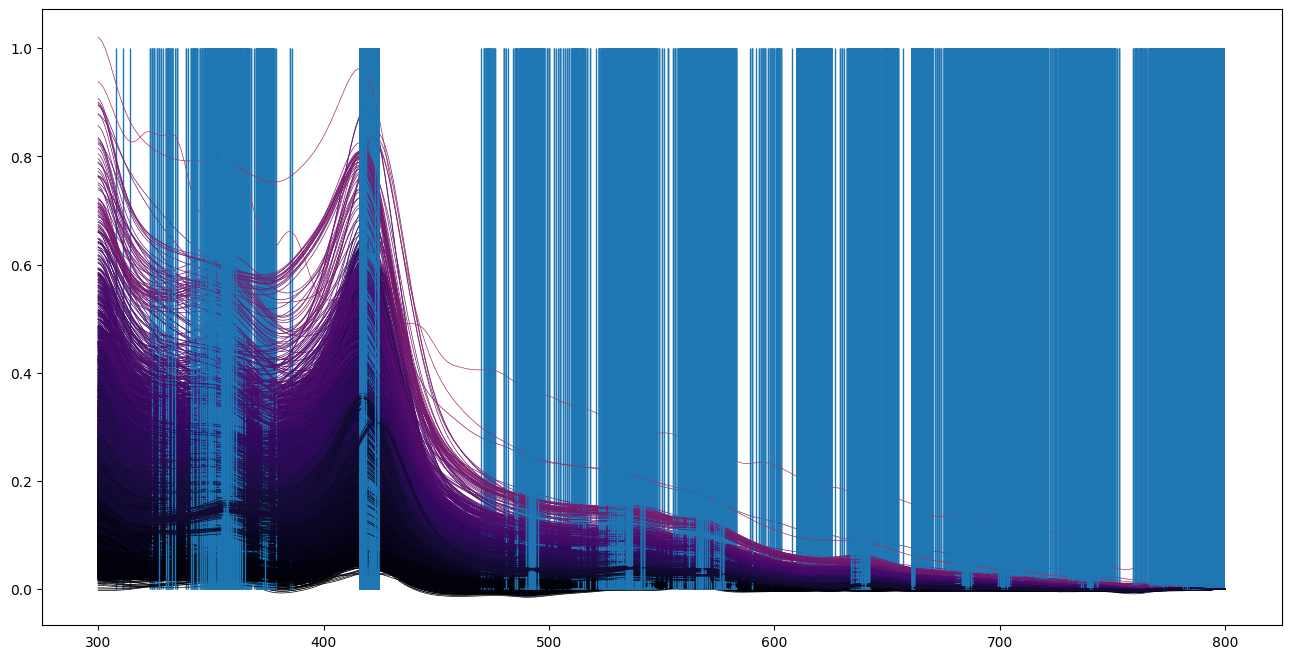

In [29]:
from scipy import signal 




fig = plt.figure(figsize=(16,8))
for i in tqdm(range(len(df_normal_smooth))):
    row = df_normal_smooth.iloc[i, :]
    peak_idx, props = signal.find_peaks(row, distance=5)
    peak_wavelengths = [row.index[i] for i in peak_idx]
    p450_peaks = [i for i in peak_wavelengths if i < 425 and i > 415]
    if len(p450_peaks) > 0:
        plt.plot(row,
                 lw=0.5,
                 c=colors_smooth[i],
                )
        plt.vlines(peak_wavelengths, 0, 1, lw=1)
plt.show()

  0%|          | 0/24528 [00:00<?, ?it/s]

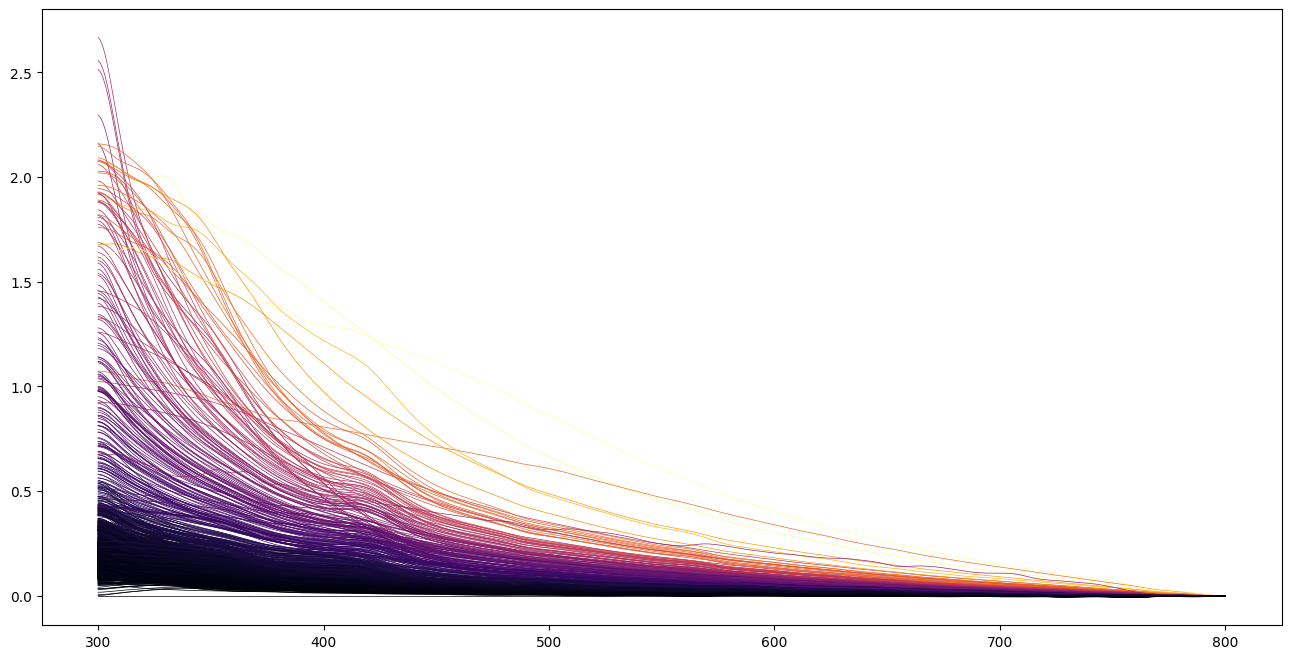

In [55]:
fig = plt.figure(figsize=(16,8))
for i in tqdm(range(len(df_normal_smooth))):
    row = df_normal_smooth.iloc[i, :]
    peak_idx, props = signal.find_peaks(row, distance=10)
    peak_wavelengths = [row.index[i] for i in peak_idx]
    p450_peaks = [i for i in peak_wavelengths if i < 450 and i > 380]
    if len(p450_peaks) == 0:
        plt.plot(row,
                 lw=0.5,
                 c=colors_smooth[i],
                )
plt.show()

  0%|          | 0/24528 [00:00<?, ?it/s]

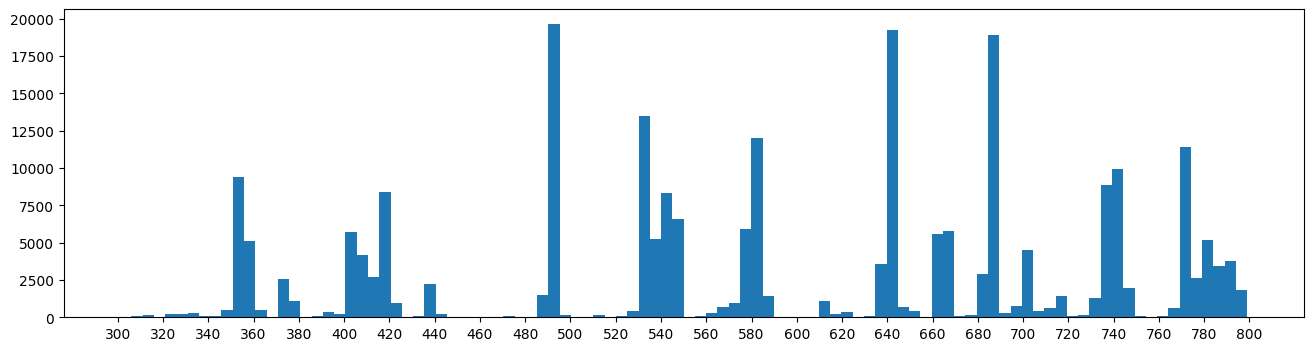

In [43]:

peaks = []

for i in tqdm(range(len(df_normal_smooth))):
    row = df_normal_smooth.iloc[i, :]
    peak_idx, props = signal.find_peaks(row, distance=5)
    peak_wavelengths = [row.index[i] for i in peak_idx]
    peaks += peak_wavelengths

plt.figure(figsize=(16,4))
plt.hist(peaks, bins=100)
ticks = df_normal_smooth.columns[::20]
plt.xticks(ticks, ticks)
plt.show()

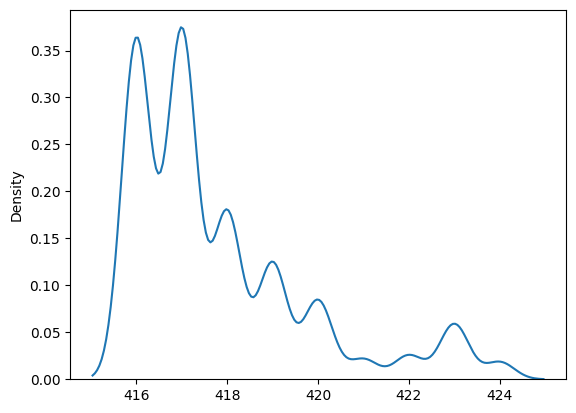

In [52]:
sns.kdeplot([i for i in peaks if i < 425 and i > 415])
plt.show()

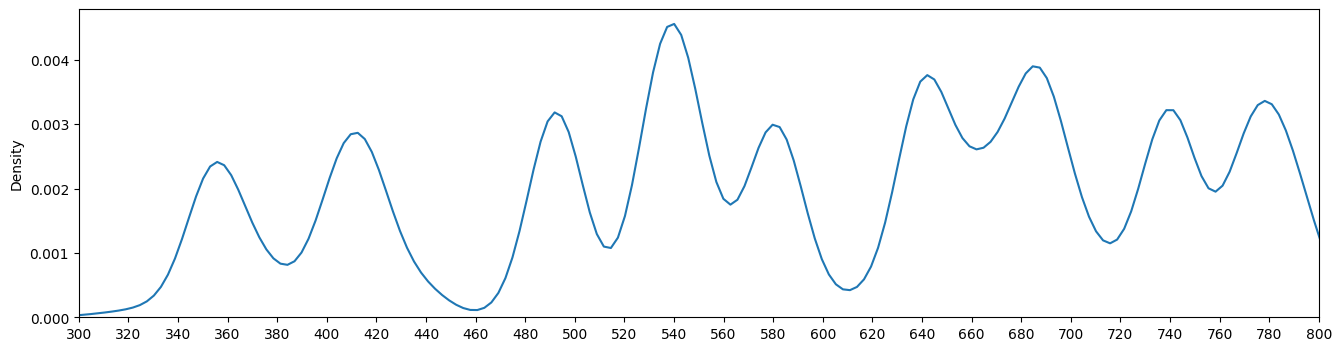

In [49]:
import seaborn as sns

ticks = df_normal_smooth.columns[::20]
plt.figure(figsize=(16,4))
sns.kdeplot(peaks)
plt.xticks(ticks, ticks)
plt.xlim(300, 800)
plt.show()

  0%|          | 0/24528 [00:00<?, ?it/s]

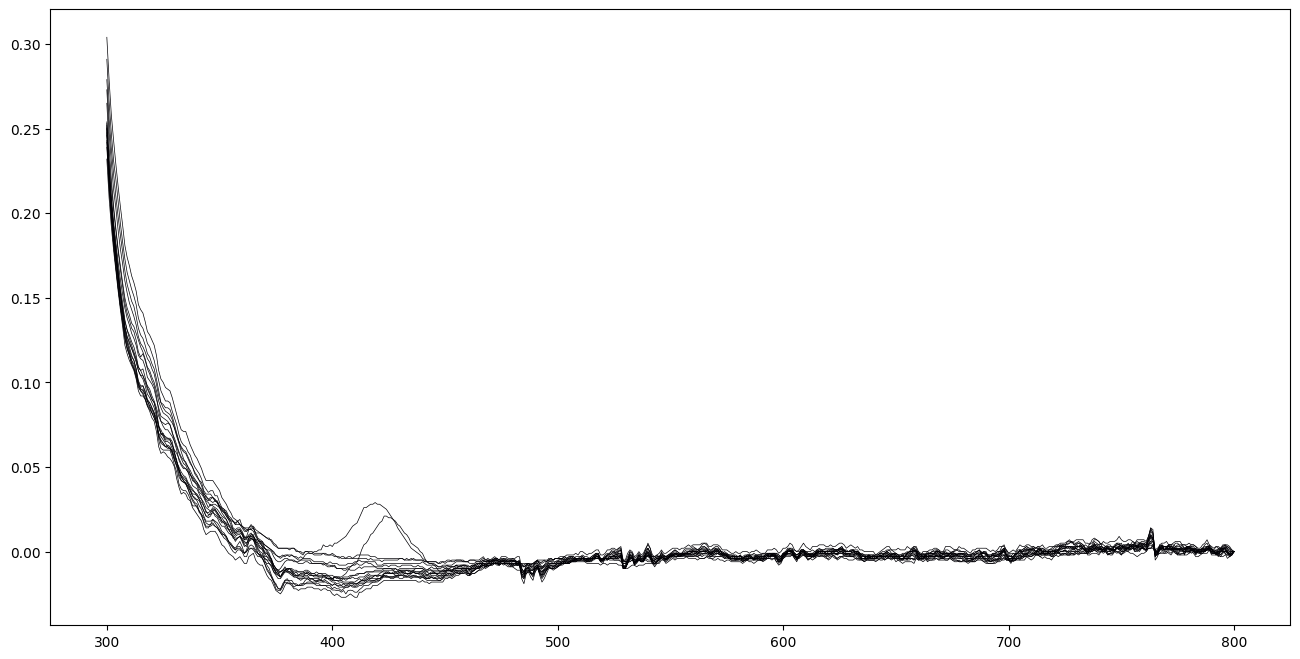

In [17]:
fig = plt.figure(figsize=(16,8))
for i in tqdm(range(len(df_normal))):
    if auc[i] < 4:
        row = df_normal.iloc[i, :]
        plt.plot(row,
                 lw=0.5,
                 c=colors[i],
                )
plt.show()

  0%|          | 0/24528 [00:00<?, ?it/s]

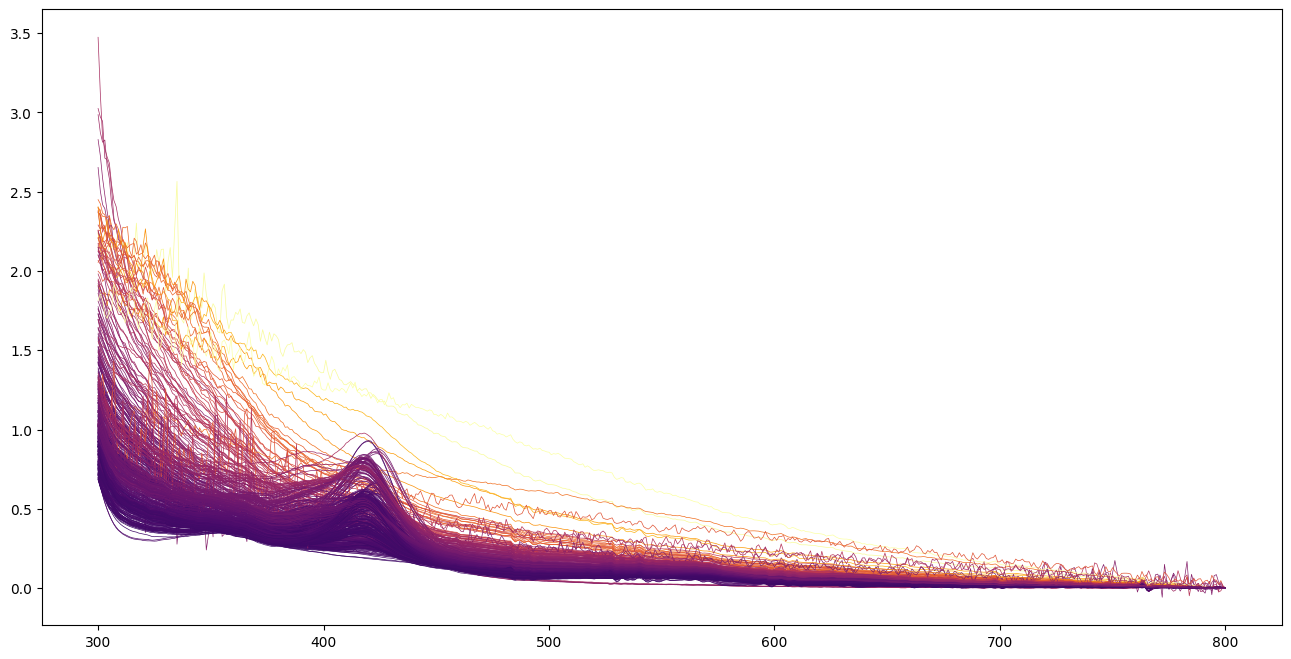

In [18]:
fig = plt.figure(figsize=(16,8))
for i in tqdm(range(len(df_normal))):
    if auc[i] > 70:
        row = df_normal.iloc[i, :]
        plt.plot(row,
                 lw=0.5,
                 c=colors[i],
                )
plt.show()

[415]


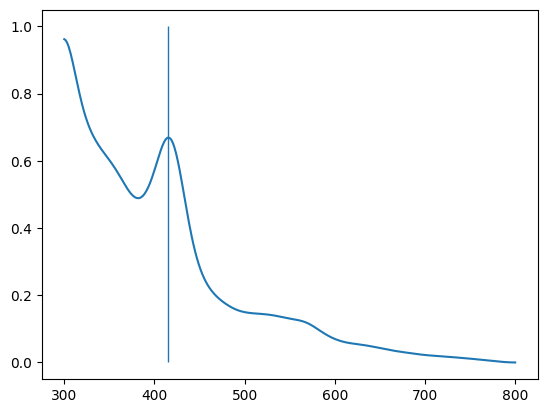

In [19]:
from scipy import signal 

row_smooth = pd.Series(ndimage.gaussian_filter1d(row, sigma=10), index=row.index)
peak_idx, props = signal.find_peaks(row_smooth, distance=5)
peak_wavelengths = [row.index[i] for i in peak_idx]

print(peak_wavelengths)
plt.plot(row_smooth)
plt.vlines(peak_wavelengths, 0, 1, lw=1)
plt.show()

In [59]:
_blanks = []
for i in tqdm(range(len(df_normal_smooth))):
    row = df_normal_smooth.iloc[i, :]
    peak_idx, props = signal.find_peaks(row, distance=10)
    peak_wavelengths = [row.index[i] for i in peak_idx]
    p450_peaks = [i for i in peak_wavelengths if i < 450 and i > 380]
    if len(p450_peaks) == 0:
        _blanks.append(row)
blanks = pd.concat(_blanks, axis=1).T
blanks

  0%|          | 0/24528 [00:00<?, ?it/s]

0        300       301       302       303       304       305       306  \
G1  0.315691  0.314616  0.312531  0.309553  0.305839  0.301562  0.296898   
B2  0.152965  0.152250  0.150871  0.148921  0.146521  0.143805  0.140904   
D2  0.124412  0.123789  0.122589  0.120898  0.118827  0.116499  0.114031   
F2  0.114487  0.113904  0.112782  0.111203  0.109272  0.107105  0.104812   
H2  0.104892  0.104352  0.103315  0.101859  0.100083  0.098098  0.096006   
..       ...       ...       ...       ...       ...       ...       ...   
D3  0.154282  0.153525  0.152067  0.150015  0.147505  0.144688  0.141708   
F3  0.127759  0.127095  0.125819  0.124024  0.121835  0.119385  0.116801   
B4  0.201246  0.200319  0.198531  0.196000  0.192883  0.189354  0.185582   
D4  0.149636  0.148903  0.147491  0.145502  0.143070  0.140337  0.137444   
F4  0.128820  0.128180  0.126951  0.125223  0.123115  0.120758  0.118273   

0        307       308       309  ...       791       792       793       794  \
G1  0.292002  0.287005  0.282002  ... -0.000475 -0.000413 -0.000347 -0.000281   
B2  0.137931  0.134976  0.132099  ... -0.000423 -0.000349 -0.000279 -0.000214   
D2  0.111521  0.109045  0.106653  ... -0.000341 -0.000264 -0.000198 -0.000143   
F2  0.102487  0.100200  0.097995  ... -0.000374 -0.000275 -0.000193 -0.000127   
H2  0.093894  0.091826  0.089839  ...  0.000008  0.000060  0.000090  0.000101   
..       ...       ...       ...  ...       ...       ...       ...       ...   
D3  0.138688  0.135721  0.132870  ...  0.000741  0.000679  0.000593  0.000491   
F3  0.114190  0.111633  0.109183  ...  0.000768  0.000688  0.000588  0.000477   
B4  0.181719  0.177883  0.174162  ...  0.000491  0.000456  0.000404  0.000340   
D4  0.134509  0.131623  0.128848  ...  0.000673  0.000598  0.000508  0.000410   
F4  0.115764  0.113310  0.110960  ...  0.000794  0.000714  0.000613  0.000499   

0        795       796       797       798       799  800  
G1 -0.000214 -0.000151 -0.000095 -0.000049 -0.000017  0.0  
B2 -0.000155 -0.000104 -0.000063 -0.000031 -0.000010  0.0  
D2 -0.000099 -0.000064 -0.000037 -0.000018 -0.000006  0.0  
F2 -0.000078 -0.000044 -0.000022 -0.000009 -0.000003  0.0  
H2  0.000095  0.000078  0.000054  0.000030  0.000011  0.0  
..       ...       ...       ...       ...       ...  ...  
D3  0.000382  0.000273  0.000173  0.000090  0.000031  0.0  
F3  0.000363  0.000254  0.000159  0.000082  0.000028  0.0  
B4  0.000268  0.000194  0.000125  0.000066  0.000023  0.0  
D4  0.000311  0.000218  0.000136  0.000070  0.000024  0.0  
F4  0.000382  0.000269  0.000169  0.000087  0.000030  0.0  

[1949 rows x 501 columns]

  0%|          | 0/1949 [00:00<?, ?it/s]

/tmp/ipykernel_2619804/2092305466.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  k, cov = optimize.curve_fit(scatter,
/tmp/ipykernel_2619804/2092305466.py:10: RuntimeWarning: invalid value encountered in scalar divide
  r_squared = 1 - (ss_res / ss_tot)


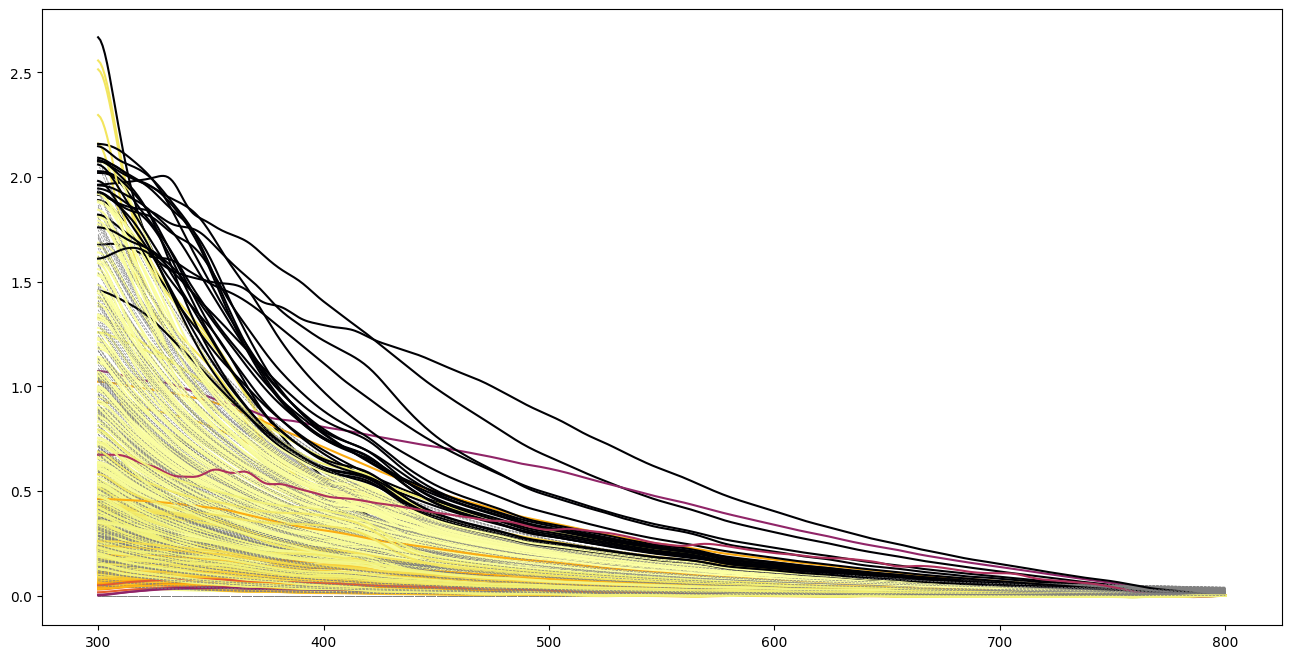

In [73]:
from scipy import optimize 

def scatter(w, k):
    return k * (1 / w**4)

def r_squared(y, y_hat):
    residuals = y - y_hat
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared


fig = plt.figure(figsize=(16,8))
for i in tqdm(range(len(blanks))):
    row = blanks.iloc[i, :]
    k, cov = optimize.curve_fit(scatter,
                                xdata=row.index,
                                ydata=row
                               )
    y_pred = pd.Series(scatter(row.index, k), index=row.index)
    rsq = r_squared(row, y_pred)
    plt.plot(row,
            c=plt.cm.inferno(rsq),
            )
    plt.plot(y_pred, linestyle='--', lw=0.5, color='gray')
    
plt.show()

  0%|          | 0/24528 [00:00<?, ?it/s]

/tmp/ipykernel_2619804/2386243310.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  k, cov = optimize.curve_fit(scatter,
/tmp/ipykernel_2619804/2386243310.py:10: RuntimeWarning: invalid value encountered in scalar divide
  r_squared = 1 - (ss_res / ss_tot)


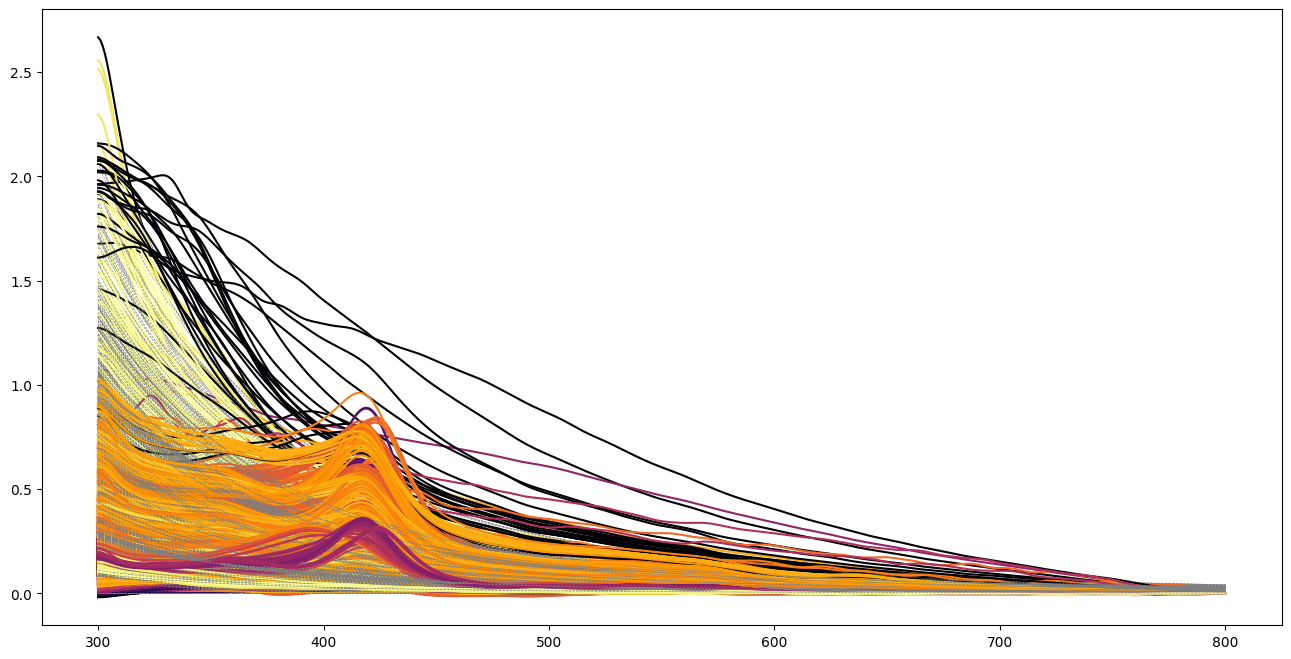

In [74]:
 from scipy import optimize 

def scatter(w, k):
    return k * (1 / w**4)

def r_squared(y, y_hat):
    residuals = y - y_hat
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared


fig = plt.figure(figsize=(16,8))
for i in tqdm(range(len(df_normal_smooth))):
    row = df_normal_smooth.iloc[i, :]
    k, cov = optimize.curve_fit(scatter,
                                xdata=row.index,
                                ydata=row
                               )
    y_pred = pd.Series(scatter(row.index, k), index=row.index)
    rsq = r_squared(row, y_pred)
    plt.plot(row,
            c=plt.cm.inferno(rsq),
            )
    plt.plot(y_pred, linestyle='--', lw=0.5, color='gray')
    
plt.show()

  0%|          | 0/24528 [00:00<?, ?it/s]

/tmp/ipykernel_2619804/1999909196.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  k, cov = optimize.curve_fit(scatter,
/tmp/ipykernel_2619804/2386243310.py:10: RuntimeWarning: invalid value encountered in scalar divide
  r_squared = 1 - (ss_res / ss_tot)


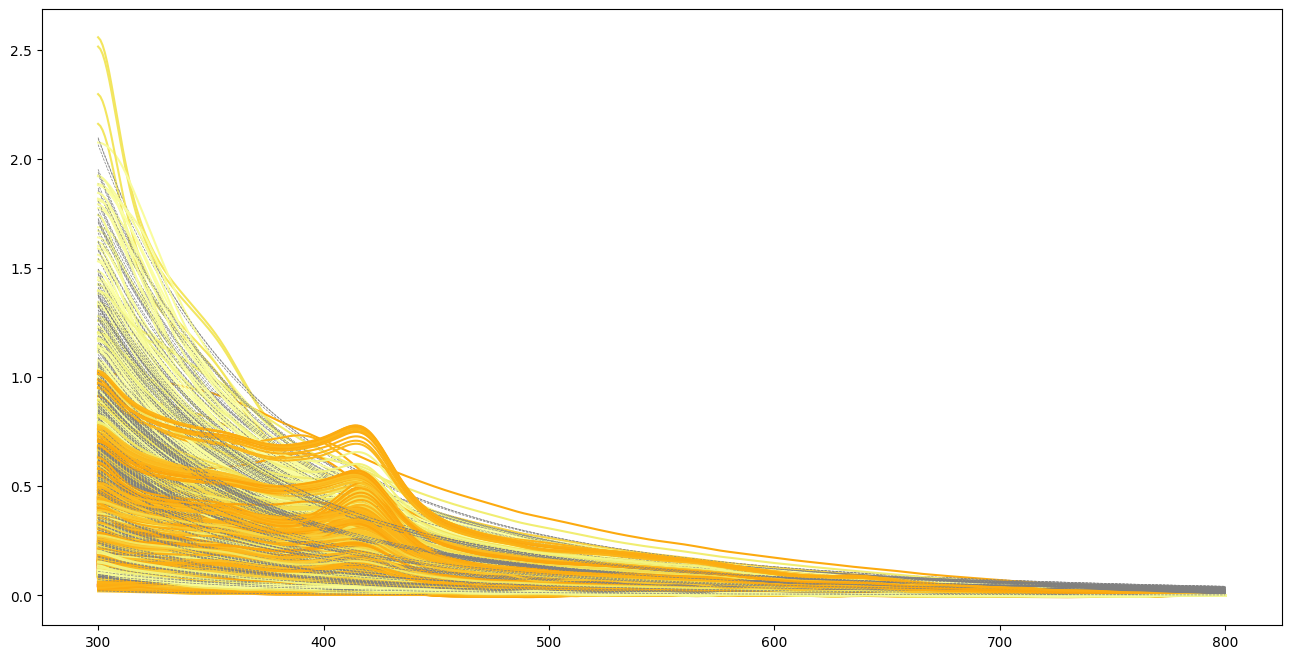

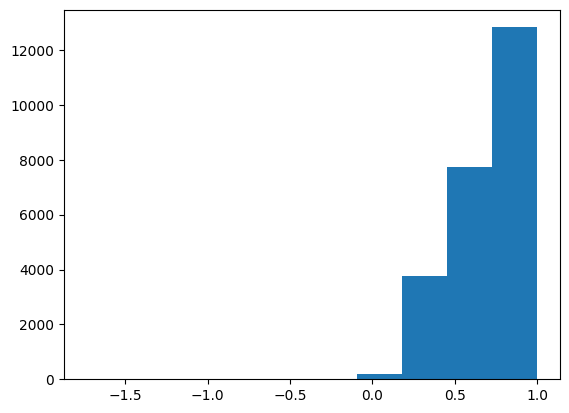

In [76]:
all_rsq = []
all_k = []

fig = plt.figure(figsize=(16,8))
for i in tqdm(range(len(df_normal_smooth))):
    row = df_normal_smooth.iloc[i, :]
    k, cov = optimize.curve_fit(scatter,
                                xdata=row.index,
                                ydata=row
                               )
    y_pred = pd.Series(scatter(row.index, k), index=row.index)
    rsq = r_squared(row, y_pred)
    all_rsq.append(rsq)
    k.append(k)
    if rsq > 0.8:
        plt.plot(row,
                c=plt.cm.inferno(rsq),
                )
        plt.plot(y_pred, linestyle='--', lw=0.5, color='gray')
    
plt.show()

plt.hist(all_rsq)
plt.show()

In [78]:
k

array([7.59936274e+08])